Base: *Titanic - Completa*

Apresentação: 

In [172]:
#Importando bibliotecas

import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import math

In [179]:
#Carregando dataset e alterando cabeçalho
dataset = pd.read_csv("https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_dados_t.csv", header=0, 
                      names = ['id_pass','sobreviveu','classe','nome','sexo','idade','parentes_bordo','pais_bordo','cod_ticket','valor_passagem','cod_cabine','onde_embarcou'])


In [180]:
dataset.head(10)

,id_pass,sobreviveu,classe,nome,sexo,idade,parentes_bordo,pais_bordo,cod_ticket,valor_passagem,cod_cabine,onde_embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [181]:
#dataset_T = dataset.describe(include="all").T
#dataset_T

dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
id_pass,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
sobreviveu,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
classe,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
idade,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
parentes_bordo,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
pais_bordo,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
valor_passagem,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
dataset.dtypes

In [23]:
dataset.shape

(891, 12)

In [72]:
#Não há dado duplicado - baseando pelo tamanho mostrado ao final

dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

###Dados Nulos

Identificando dados nulos

In [183]:
dataset_T['nulos'] = pd.DataFrame(dataset.isnull().sum())
dataset_T['prct_nulo'] = pd.DataFrame(dataset.isna().mean().round(4) * 100)
dataset_T["type"] = pd.Series(dataset.dtypes)
dataset_T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulos,prct_nulo,type
id_pass,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891,0,0.00,int64
sobreviveu,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1,0,0.00,int64
classe,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3,0,0.00,int64
nome,891,891,"Lam, Mr. Ali",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
sexo,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
idade,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80,177,19.87,float64
parentes_bordo,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8,0,0.00,int64
pais_bordo,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6,0,0.00,int64
cod_ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,object
valor_passagem,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329,0,0.00,float64


No resultado acima vemos que o atributo 'idade' possui 177 nulos o que equivale 19.87% no geral, assim como 'cod_cabine' possui 687 nulos, 77.10% e o atributo 'onde_embarcou' possui 2 nulos, 0.22% no geral. 

Ao que parece pela quantidade de campos nulos no atributo 'cod_cabine' se comparado no total de dados, poderia ser descartado sem trazer danos significativos.

In [82]:
 print("Qtd de registros faltante {}".format(dataset[dataset['onde_embarcou'].isnull()].shape[0]))
 dataset[dataset['onde_embarcou'].isnull()]
 

Qtd de registros faltante 2


,id_pass,sobreviveu,classe,nome,sexo,idade,parentes_bordo,pais_bordo,cod_ticket,valor_passagem,cod_cabine,onde_embarcou
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Hipótese: Possivelmente as duas passageiras embarcaram no mesmo local se basearmos na semelhança do valor da passagem que pagaram, a cabine em que ficaram e o cód do ticket que possuíam. Apesar da idade bem distinta, pode haver algum fator que influencie no valor da passagem (pensando na possibilidade da idade influenciar um seguro no caso de ser mais velho). Além disso ambas são primeira classe, o que pode ter alguma regalia que com apenas essas duas linhas fica difícil descobrir.

O bom é que ambas sobreviveram. Será que há alguma ligação?

In [63]:
 print("Qtd de registros faltante {}".format(dataset[dataset['idade'].isnull()].shape[0]))
 dataset[dataset['idade'].isnull()]

Qtd de registros faltante 177


,id_pass,sobreviveu,classe,nome,sexo,idade,parentes_bordo,pais_bordo,cod_ticket,valor_passagem,cod_cabine,onde_embarcou
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
 print("Qtd de registros faltante {}".format(dataset[dataset['cod_cabine'].isnull()].shape[0]))
 dataset[dataset['cod_cabine'].isnull()]

In [136]:
#Atualizando a coluna que contém o código da cabine do passageiro com nulos para 'Não cadastrada'
dataset.update(dataset['cod_cabine'].fillna('Não cadastrada'))

#Removendo linhas onde não se sabe onde embarcou - 2
#ds = ds.drop(61)
#s = ds.drop(829)

In [137]:
#DataSet atualizado 
dataset

,id_pass,sobreviveu,classe,nome,sexo,idade,parentes_bordo,pais_bordo,cod_ticket,valor_passagem,cod_cabine,onde_embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Não cadastrada,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Não cadastrada,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Não cadastrada,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Não cadastrada,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Não cadastrada,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [140]:
#Separando os passageiros por título para inferir a idade conforme o tratamento

def extrairTitulo(df):
  df['título'] = df.nome.apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())

extrairTitulo(dataset)

In [155]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_pass,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
sobreviveu,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
classe,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
nome,891,891,"Lam, Mr. Ali",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idade,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
parentes_bordo,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
pais_bordo,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
cod_ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_passagem,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


Text(0.5, 0, 'Qtd de Título')

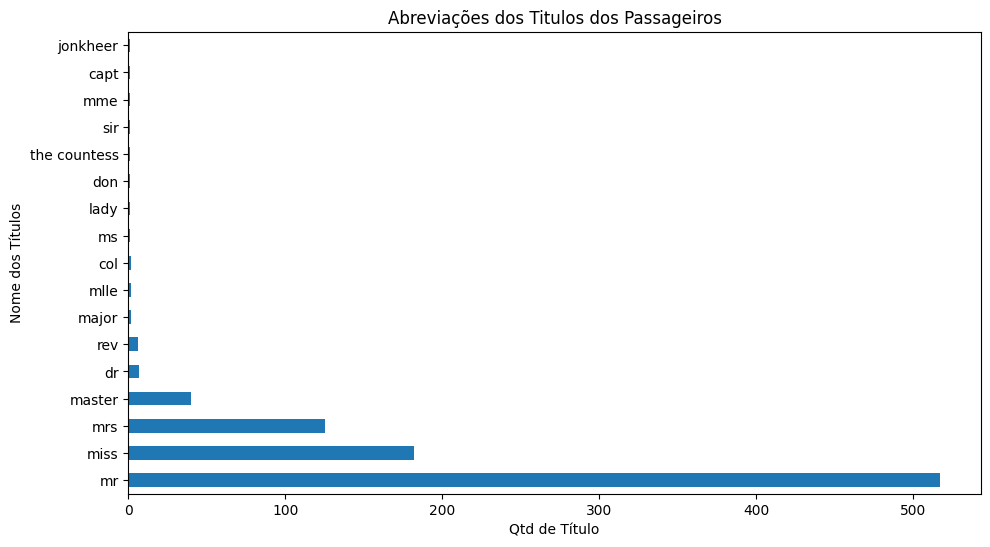

In [144]:
fig = pyplot.figure(figsize=(11,6))
fig = dataset['título'].value_counts().plot.barh()
fig.set_title('Abreviações dos Titulos dos Passageiros')
fig.set_ylabel('Nome dos Títulos')
fig.set_xlabel('Qtd de Título')

In [145]:

print(dataset.groupby('título').size())

título
capt              1
col               2
don               1
dr                7
jonkheer          1
lady              1
major             2
master           40
miss            182
mlle              2
mme               1
mr              517
mrs             125
ms                1
rev               6
sir               1
the countess      1
dtype: int64


In [157]:
 # Faltantes para cada Título
 print(dataset[dataset['idade'].isnull()].groupby('título').size())

título
dr          1
master      4
miss       36
mr        119
mrs        17
dtype: int64
